<a href="https://colab.research.google.com/github/TanviMhetre/Delinquency-of-Credit-Card-Holders/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data Loaded Successfully!
Shape: (500, 19)
  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0           

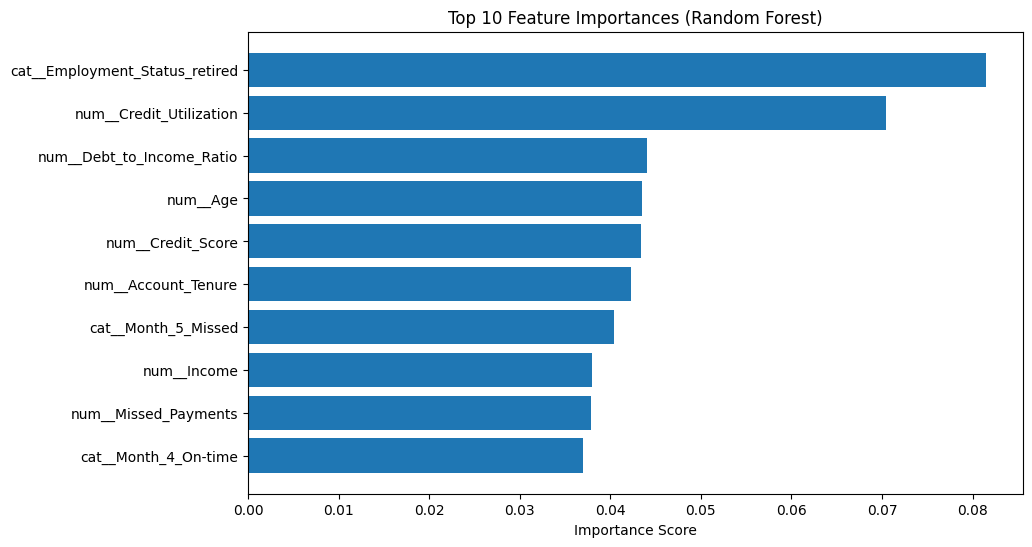

In [ ]:
# 🚀 Improved Predictive Modeling for Delinquency
# Using Logistic Regression, SMOTEENN Balancing, and Cross-Validation

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# ---------------------------
# Step 1: Load Dataset
# ---------------------------
data = pd.read_csv("/content/Delinquency_prediction_dataset.csv")
print("✅ Data Loaded Successfully!")
print("Shape:", data.shape)
print(data.head())

# ---------------------------
# Step 2: Handle Missing Values
# ---------------------------
data = data.dropna()

# ---------------------------
# Step 3: Define Target and Features
# ---------------------------
target_col = 'Delinquent_Account'   # 🔁 Change this to your actual target column name
X = data.drop(columns=[target_col])
y = data[target_col]

# ---------------------------
# Step 4: Shuffle Data
# ---------------------------
X, y = shuffle(X, y, random_state=42)

# ---------------------------
# Step 5: Identify Feature Types
# ---------------------------
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# ---------------------------
# Step 6: Preprocessing Pipeline
# ---------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# ---------------------------
# Step 7: Apply SMOTEENN (Better Balancing)
# ---------------------------
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(
    preprocessor.fit_transform(X), y
)

print("\n✅ Class balance after SMOTEENN:")
print(y_balanced.value_counts())

# ---------------------------
# Step 8: Logistic Regression Model
# ---------------------------
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_balanced, y_balanced)
y_pred = log_model.predict(X_balanced)

# ---------------------------
# Step 9: Evaluation
# ---------------------------
print("\n📊 Model Performance (Logistic Regression):")
print("Accuracy:", accuracy_score(y_balanced, y_pred))
print("Precision:", precision_score(y_balanced, y_pred))
print("Recall:", recall_score(y_balanced, y_pred))
print("F1 Score:", f1_score(y_balanced, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_balanced, y_pred))
print("\nClassification Report:\n", classification_report(y_balanced, y_pred))

# ---------------------------
# Step 10: Cross-Validation
# ---------------------------
cv_scores = cross_val_score(log_model, X_balanced, y_balanced, cv=5, scoring='accuracy')
print("\n📈 5-Fold Cross-Validation Accuracy:", np.mean(cv_scores))

# ---------------------------
# Step 11: Feature Importance (via Random Forest)
# ---------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_balanced, y_balanced)

importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(feat_imp.head(10))

# Optional: Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()